## Задание 1

In [2]:
import math

import numpy as np
from matplotlib import pyplot
from numpy import mean, var, std
from scipy import stats
from collections import Counter, OrderedDict


def lcg(n):
    """
    Linear congruential generator
    """
    a = 1567
    m = 68030
    r = 2797
    numbers = []

    i = 0
    while i < n:
        r = (a * r) % m
        numbers.insert(i, round(r / m, 4))
        i += 1

    return numbers


def chi_square_test(observed, expected, alpha, dof):
    result = 0

    for i in range(len(observed)):
        result = float(result) + (expected[i] - observed[i]) ** 2 / float(expected[i])

    result *= len(observed)

    critical_value = stats.chi2.ppf(1 - alpha, dof)

    print(f'CHI_SQUARE_TEST')

    print(f'result = {result}')

    print(f'critical_value = {critical_value}')

    if result < critical_value:
        print(f'{result} < {critical_value} --> OK')
    else:
        print(f'{result} > {critical_value} --> FAIL')

    return result, result < critical_value


def get_interval_mu(gamma, mu, sigma, n):
    t = stats.t.ppf(gamma, n - 1)
    delta = t * sigma / np.sqrt(n)
    return mu - delta, mu + delta


def get_interval_sigma(gamma, sigma, n):
    alpha1 = (1 - gamma) / 2.0
    alpha2 = (1 + gamma) / 2.0

    right_border = np.sqrt((n - 1) / stats.chi2.ppf(alpha1, n - 1)) * sigma
    left_border = np.sqrt((n - 1) / stats.chi2.ppf(alpha2, n - 1)) * sigma

    return left_border, right_border

### Экспоненциальное распределение
![](images/exponential.png)

Экспоненциальное распределение:
Мат. ожидание:  0.997726241310722
Дисперсия:  0.9906486084708781
Среднеквадратичное отклонение: 0.9953133217589716

Доверительная вероятность == 0.99
Доверительный интервал Мат. ожидания:  0.9904 < mu <  1.0050
Доверительный интервал СКО:  0.9896 < sigma <  1.0011

CHI_SQUARE_TEST
result = 58.44479691606806
critical_value = 246.09465845289168
58.44479691606806 < 246.09465845289168 --> OK


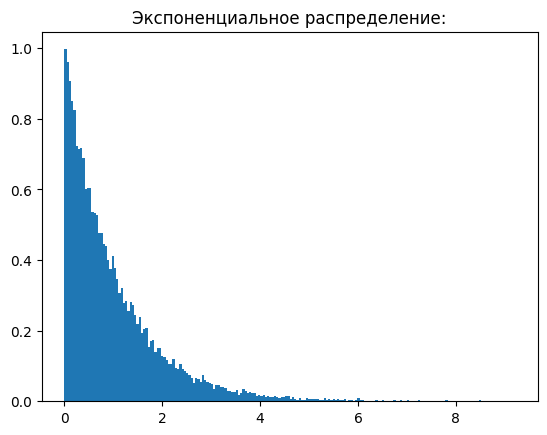

In [3]:
def exponential_numbers(L, size):
    numbers = lcg(size)
    array = []
    for num in numbers:
        if 1 - num > 0:
            array.append(((-1) / L) * (math.log(1 - num)))
    return array


def exponential_f(l, x):
    return l * np.exp(-l * x)


def get_exponential_expected(size, l, arguments):
    expected = []

    for i in range(size):
        expected.append(exponential_f(l, arguments[i]))

    return expected


def exponential_distribution():
    L = 1
    size = 10 ** 5
    exp = exponential_numbers(L, size)
    exp_m = mean(exp)
    exp_v = var(exp)
    exp_s = std(exp)
    probabilities, intervals, _ = pyplot.hist(exp, bins=200, density=True)
    intervals = intervals[1:]
    expected = get_exponential_expected(len(probabilities), L, intervals)
    pyplot.title("Экспоненциальное распределение:")
    print("Экспоненциальное распределение:")
    print("Мат. ожидание: ", exp_m)
    print("Дисперсия: ", exp_v)
    print(f"Среднеквадратичное отклонение: {exp_s}\n")
    gamma = 0.99
    print(f'Доверительная вероятность == {gamma}')
    mu_left_border, mu_right_border = get_interval_mu(gamma, exp_m, exp_s, size)
    print(f'Доверительный интервал Мат. ожидания: {mu_left_border : .4f} < mu < {mu_right_border : .4f}')
    sigma_left_border, sigma_right_border = get_interval_sigma(gamma, exp_s, size)
    print(f'Доверительный интервал СКО: {sigma_left_border : .4f} < sigma < {sigma_right_border : .4f}\n')
    chi_square_test(probabilities, expected, 0.01, len(intervals) - 3)

exponential_distribution()
pyplot.show()

### Равномерное распределение

Равномерное распределение:
Мат. ожидание:  1.999631246
Дисперсия:  0.33359456568888746
Среднеквадратичное отклонение : 0.5775764587384837

Доверительная вероятность == 0.99
Доверительный интервал Мат. ожидания:  1.9954 < mu <  2.0039
Доверительный интервал СКО:  0.5743 < sigma <  0.5809

CHI_SQUARE_TEST
result = 62.67937499999606
critical_value = 190.93795718307996
62.67937499999606 < 190.93795718307996 --> OK


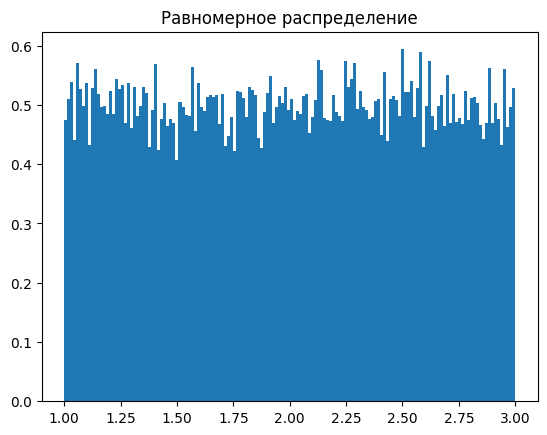

In [4]:
def uniform_numbers(a, b, n):
    numbers = lcg(n)
    for i in range(len(numbers)):
        numbers[i] = (a + (b - a) * numbers[i])
    return numbers


def uniform_f(a, b):
    return 1.0 / (b - a)


def get_uniform_expected(size, a, b):
    expected = []

    for _ in range(size):
        expected.append(uniform_f(a, b))

    return expected


def uniform_distribution():
    low = 1
    high = 3
    size = 10 ** 5
    numbers = uniform_numbers(low, high, size)
    uniform_m = mean(numbers)
    uniform_v = var(numbers)
    uniform_s = std(numbers)
    probabilities, intervals, _ = pyplot.hist(numbers, bins=150, density=True)
    expected = get_uniform_expected(len(probabilities), low, high)
    pyplot.title("Равномерное распределение")
    print("Равномерное распределение:")
    print("Мат. ожидание: ", uniform_m)
    print("Дисперсия: ", uniform_v)
    print(f"Среднеквадратичное отклонение : {uniform_s}\n")
    gamma = 0.99
    print(f'Доверительная вероятность == {gamma}')
    mu_left_border, mu_right_border = get_interval_mu(gamma, uniform_m, uniform_s, size)
    print(f'Доверительный интервал Мат. ожидания: {mu_left_border : .4f} < mu < {mu_right_border : .4f}')
    sigma_left_border, sigma_right_border = get_interval_sigma(gamma, uniform_s, size)
    print(f'Доверительный интервал СКО: {sigma_left_border : .4f} < sigma < {sigma_right_border : .4f}\n')
    chi_square_test(probabilities, expected, 0.01, len(intervals) - 3)

uniform_distribution()
pyplot.show()

## Задание 2 (вариант 12)
## Равномерное прямоугольное распределение

Равномерное дискретное распределение:
Мат. ожидание:  5.62873125
Дисперсия:  2.9560900777734376
Среднеквадратичное отклонение: 1.7193283798545982

Доверительная вероятность == 0.99
Доверительный интервал Мат. ожидания:  5.6247 < mu <  5.6327
Доверительный интервал СКО:  1.7162 < sigma <  1.7225

CHI_SQUARE_TEST
result = 0.0020737640960000027
critical_value = 15.08627246938899
0.0020737640960000027 < 15.08627246938899 --> OK


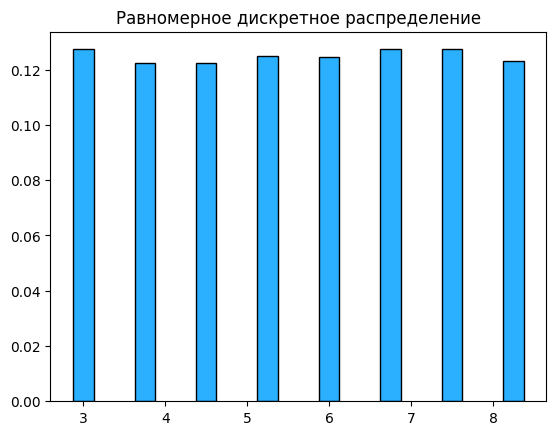

In [5]:
def uniform_discrete_function(a, b, n):
    numbers = {a + i * (b - a) / n: 1 / n for i in range(n)}
    return numbers


def uniform_discrete_numbers(a, b, n, function_values):
    numbers = lcg(n)
    arguments = list(function_values.keys())
    arguments.sort()
    res = []
    for i in range(len(numbers)):
        generated_number = a + (b - a) * numbers[i]
        for j in range(len(arguments)):
            if j == len(arguments) - 1 or arguments[j] < generated_number < arguments[j + 1]:
                res.append(arguments[j])
                break
    return res


def uniform_discrete_distribution():
    a = 3
    b = 9
    size = 10 ** 6
    discrete_number_size = 8
    function_values = uniform_discrete_function(a, b, discrete_number_size)
    numbers = uniform_discrete_numbers(a, b, size, function_values)
    uniform_m = mean(numbers)
    uniform_v = var(numbers)
    uniform_s = std(numbers)
    observed_values = OrderedDict({k: v / size for k, v in Counter(numbers).items()})
    pyplot.bar(
        observed_values.keys(),
        observed_values.values(),
        facecolor='#2ab0ff',
        edgecolor='#000000',
        width=2 / discrete_number_size
    )
    expected = list(function_values.values())
    pyplot.title("Равномерное дискретное распределение")
    print("Равномерное дискретное распределение:")
    print("Мат. ожидание: ", uniform_m)
    print("Дисперсия: ", uniform_v)
    print(f"Среднеквадратичное отклонение: {uniform_s}\n")
    gamma = 0.99
    print(f'Доверительная вероятность == {gamma}')
    mu_left_border, mu_right_border = get_interval_mu(gamma, uniform_m, uniform_s, size)
    print(f'Доверительный интервал Мат. ожидания: {mu_left_border : .4f} < mu < {mu_right_border : .4f}')
    sigma_left_border, sigma_right_border = get_interval_sigma(gamma, uniform_s, size)
    print(f'Доверительный интервал СКО: {sigma_left_border : .4f} < sigma < {sigma_right_border : .4f}\n')
    chi_square_test(list(observed_values.values()), expected, 0.01, len(observed_values) - 3)

uniform_discrete_distribution()
pyplot.show()